In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install statsmodels
# !pip install sklearn

You should consider upgrading via the 'c:\users\egor\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\egor\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\egor\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\egor\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\egor\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import math

In [33]:
import tensorflow.keras as keras
from statsmodels.api import OLS
from sklearn import svm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.layers import Dense, LSTM

In [5]:
with open('dataset.pkl', 'rb') as f:
    data = pickle.load(f)

In [6]:
new_data = data['MutantApeYachtClub'].copy()
new_data = new_data.dropna()
new_data.head()

,dates,prices_avg,prices_floor,prices_median,volume,marketcap,lowwatermark,amount_transactions,amount_owners,amount_sellers,amount_buyers,btc adj close,btc volume,eth adj close,eth volume,sol adj close,sol volume,change in btc,change in eth,change in sol
1,2021-08-30,42150.432895,0.000000,32023.800781,4.611257e+07,3.916317e+06,20522.01,1094,7503.0,2.0,46.0,47054.984375,31847007016,3224.374268,19306924485,110.544807,5274104165,-1774.847656,-2.628418,16.075134
2,2021-08-31,34728.502238,0.000000,28324.003906,1.972579e+07,7.019255e+06,20522.01,568,7693.0,3.0,24.0,47166.687500,34730363427,3433.732666,27280502987,108.483772,7590894022,111.703125,209.358398,-2.061035
3,2021-09-01,34049.167712,1848.198730,24513.210938,1.637765e+07,2.655862e+07,20522.01,481,7793.0,6.0,42.0,48847.027344,39139399125,3834.828125,30070890104,111.033005,3974443896,1680.339844,401.095459,2.549232
4,2021-09-02,26299.774417,12414.097656,22857.037109,1.041471e+07,1.794458e+08,20522.01,396,7933.0,9.0,21.0,49327.722656,39508070319,3790.989990,24387397330,128.102386,5074399603,480.695312,-43.838135,17.069382
5,2021-09-03,27429.236859,16469.503906,23066.734375,7.159031e+06,2.389890e+08,20522.01,261,7992.0,3.0,32.0,50025.375000,43206179619,3940.614746,26207765094,146.583054,7526373837,697.652344,149.624756,18.480667


In [ ]:
#         reg = LinearRegression()
#         reg.fit(X_train, y_train)
#         predictions = reg.predict(X_test)
#         RMSE = np.sqrt(mean_squared_error(y_test, predictions))
#         r2 = r2_score(y_test, predictions)

In [50]:
results = pd.DataFrame(columns = ['Collection', 'R^2', 'RMSE',  'Len'])
error = []

for i in data.keys():
    try:
        new_data = data[i].copy()
        new_data = new_data.dropna(axis=1, how='all')
        new_data = new_data.dropna(axis=0)
        y = new_data['prices_avg'].copy()
        x = new_data.drop(['prices_floor', 'prices_avg', 'prices_median', 'dates'], axis=1).copy()

        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=111)

        reg = LinearRegression()
        reg.fit(X_train, y_train)
        predictions = reg.predict(X_test)
        RMSE = np.sqrt(mean_squared_error(y_test, predictions))
        r2 = r2_score(y_test, predictions)
        
        res = {'Collection': i,'R^2' : r2,'RMSE' : RMSE, 'Len' : len(new_data)}
        results = results.append(res, ignore_index = True)
        print('collection ' + i + ' done')
    except:
        error.append(i)
        print('Collection ' + i + 'not done')


collection Otherdeed done
collection projectPXN done
collection Azuki done
collection Bored Ape Yacht Club done
collection BEANZ Official done
collection MutantApeYachtClub done
collection goblintown done
collection Doodles done
collection CloneX done
collection Moonbirds done
collection Art Blocks Factory done
collection Chimpers done
collection Murakami.Flowers done
collection Ragnarok done
collection Boki done
collection Genesis done
collection DEGEN TOONZ done
collection Mindblowon done
collection AIMoonbirds done
collection Rektguy done
collection adidas Originals: Into the Metaverse done
collection Meebits done
collection Moonbirds Oddities done
collection BoredApeKennelClub done
collection Bored Ape Chemistry Club done
collection Murakami.Flowers Seed done
collection VeeFriends Series 2 done
collection RTFKT - MNLTH done
collection Cool Cats done
Collection Akumu Dragonznot done
collection Imaginary Ones done
collection TBAC done
collection CPG Pop done
collection Dooplicator do

c:\users\egor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


collection PROOF Collective done
collection Sandbox's LANDs done
collection Project NANOPASS done
collection mfer done
collection PREMINT Collector Pass - OFFICIAL done
collection NFT Worlds done
collection GOBLIN GRLZ done
collection 3Landers done
collection The Art of Seasons done
collection CyberBrokers done
collection VeeFriends done
collection Tigerbob done
collection Akutars done
collection Cyber Factory 2 done
collection Something Token done
collection 10KTF Stockroom done
collection Quirkies Originals done
collection OkayBearsYachtClub done
collection Nouns done
collection Oddstronauts done
collection Regulars done
collection World Of Women Galaxy done
collection Cheers UP Period done
collection IDZ done
collection Psychedelics Anonymous Genesis done
collection MNLTHRVLD done
collection Rareland done
Collection pieceofshitnot done
collection KaijuKingz done
collection Impostors Genesis Aliens done
collection Kith Friends done
collection KILLABEARS done
collection MURI done
coll

c:\users\egor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\users\egor\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [51]:
print(results.describe())

               R^2          RMSE
count    88.000000     91.000000
mean   -102.273477   3800.962225
std     845.627776   9377.928625
min   -7924.133902      9.723142
25%      -1.333290    357.143354
50%       0.497441   1102.008291
75%       0.860979   2916.835420
max       0.996301  71004.764392


In [52]:
results

,Collection,R^2,RMSE,Len
0,Otherdeed,0.197903,6965.707566,32
1,projectPXN,0.683405,1247.928966,24
2,Azuki,0.844414,11355.921672,136
3,Bored Ape Yacht Club,0.910432,39745.088716,388
4,BEANZ Official,0.927610,1641.309059,62
...,...,...,...,...
86,TheCurrency,0.956606,3116.962154,262
87,Verb,-9.777651,250.390751,15
88,HALO NFT,NaN,358.522702,4
89,NFT Worlds Genesis Avatars,-0.732520,112.980155,26


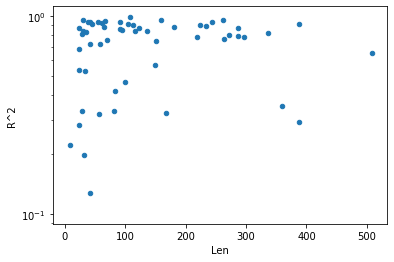

In [19]:
results.plot.scatter(x="Len", y="R^2", logy=True);

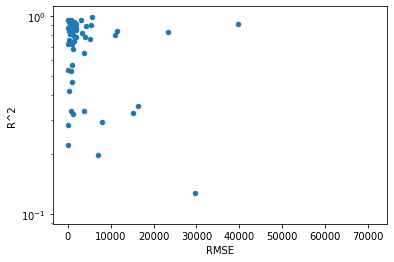

In [20]:
results.plot.scatter(x="RMSE", y="R^2", logy=True);